In [1]:
import pandas as pd # para crear tablas
from sklearn.tree import DecisionTreeClassifier # módulo para el clasificador
from sklearn import svm # módulo para el clasificador
from sklearn.model_selection import train_test_split # para dividir conjunto de datos
from sklearn import metrics # para evaluar el modelo
from sklearn.preprocessing import StandardScaler # para escalar los datos
from sklearn.model_selection import KFold, cross_val_score # para validación cruzada

# librerías para graficar
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.shape

(2011, 10)

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [10]:
x = df.drop("Potability", axis = 1)
y = df["Potability"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [12]:
X_train.shape

(1407, 9)

In [13]:
X_test.shape

(604, 9)

In [75]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth =4, splitter = "best")

In [15]:
support_vector = svm.SVC(kernel = "poly", C = 0.1, probability=True)

In [76]:
model_tree = tree.fit(X_train, y_train)

In [17]:
model_svc = support_vector.fit(X_train, y_train)

# Predicción

In [77]:
y_pred = model_tree.predict(X_test)

In [31]:
y_pred = model_svc.predict(X_test)

# Evaluación

In [78]:
metrics.accuracy_score(y_test, y_pred) # porcentaje de predicción de valores verdaderos positivos y negativos

0.6374172185430463

In [79]:
metrics.recall_score(y_test, y_pred)

0.13596491228070176

In [80]:
metrics.precision_score(y_test, y_pred)

0.5849056603773585

In [60]:
metrics.f1_score(y_test, y_pred)

0.2206405693950178

* El poly fue el mas rapido, todos tenian la misma precision para el de Vector 

* Para el decision tree se utilizo gini y entropy y entropy termino siendo el "Mejor" (sin cambiar mucho) y el depth tampoco cambiaba mucho

### Matríz de Confusión

In [81]:
matriz = metrics.confusion_matrix(y_test, y_pred)
matriz

array([[354,  22],
       [197,  31]], dtype=int64)

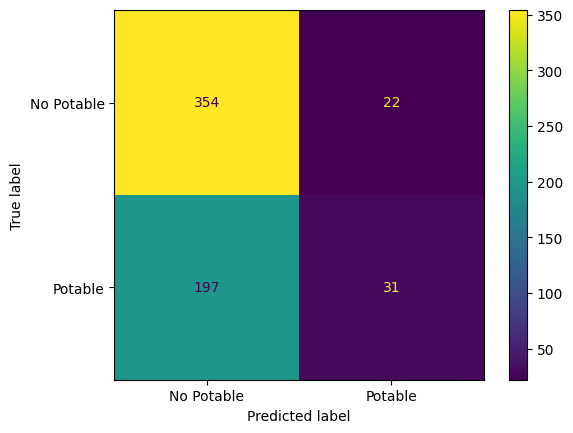

In [82]:
matriz_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels =["No Potable", "Potable"])
matriz_plot.plot()
plt.show()

# ROC

In [64]:
y_pred_proba = model_tree.predict_proba(X_test)

In [65]:
y_pred_proba = y_pred_proba[:,1]

In [66]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.5522583053378127

In [67]:
false_negative_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_pred_proba)

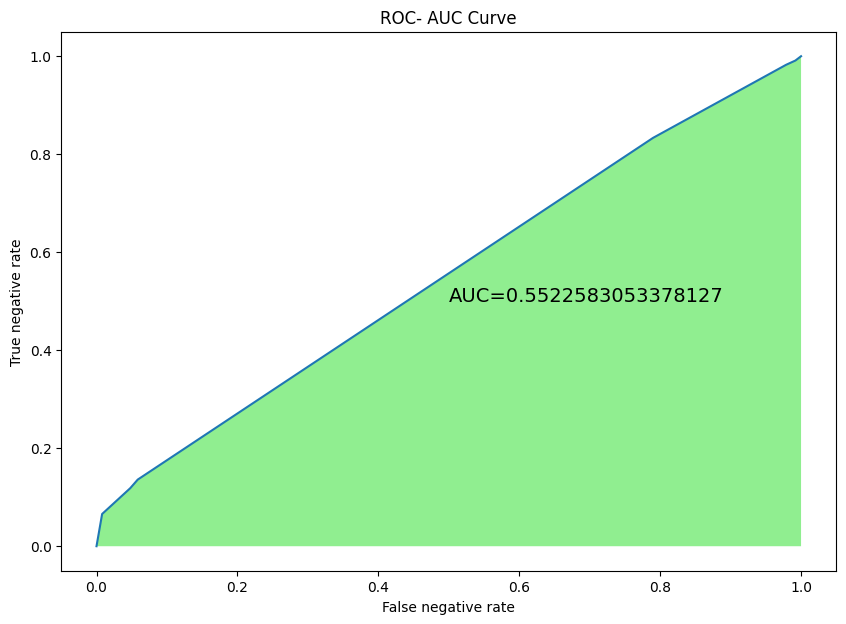

In [68]:
plt.figure(figsize=(10,7))
plt.plot(false_negative_rate, true_positive_rate)
plt.fill_between(false_negative_rate, true_positive_rate, facecolor="lightgreen")
plt.title("ROC- AUC Curve")
plt.text(.5,.5, "AUC=" + str(auc), fontsize=14)
plt.xlabel("False negative rate")
plt.ylabel("True negative rate")
plt.show()

# Cross Validation

In [69]:
k_folds = KFold(n_splits=10, random_state = 1, shuffle=True)

In [70]:
f1_scores = cross_val_score(model_tree, x , y, scoring ="f1", cv = k_folds)

In [71]:
print("Cross validation F1-scores:", f1_scores)

Cross validation F1-scores: [0.51798561 0.23913043 0.30188679 0.18556701 0.39130435 0.36842105
 0.47540984 0.10309278 0.32       0.40322581]


In [72]:
print("Mean Cross validation F1-scores:", f1_scores.mean())

Mean Cross validation F1-scores: 0.33060236755355155


# Muestra de preccision

In [73]:
results = pd.DataFrame({"Real": y_test, "Predicción": y_pred})
results = results.sample(n = 20)
results

,Real,Predicción
2046,1,0
864,0,0
2644,0,0
1442,0,0
1757,0,0
969,0,0
2833,1,0
2216,0,1
2929,0,0
2926,0,0


Justifica la elección y concluye sobre los mejores y peores resultados
- Se utilizó el arbol de deciciones porque es el que tenia más precision pero aún así no es muy preciso